In [2]:
import numpy as np
from matplotlib import pyplot as plt

(A) Simulate 10K samples of the tuple (y, x), where y = -(X-2)^2 + 3 + N, X is uniformly distributed between [0,4] and N is a Normal Distributed Random variable of mean = 0 and standard deviation = 0.1. Plot the generated dataset.

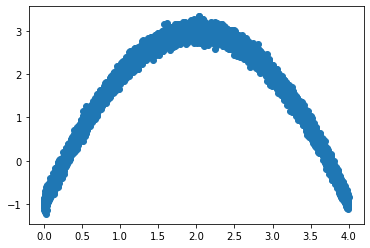

In [9]:
X = np.random.rand(
    (10000)
)*4

N = np.random.normal(loc=0.0, scale=0.1, size = (10000))

y = - np.square(X-2) + 3 + N

plt.scatter(X, y)

(B) Find the best quadratic polynomial that fits the dataset generated in (A), using x as the feature, y as the labels, and gradient descent as the optimization algorithm. (y_hat = w1 * X^2 + w2 * X + b) 

In [ ]:
# gradient descent

'''

 (y-y_hat)^2

 (w1 * X^2 + w2 * X + b) = 


gradient_w1 = -2 * (y-(w1 * X^2 + w2 * X + b))* x^2
gradient_w2 = -2 * (y-(w1 * X^2 + w2 * X + b))* x
gradient_b = -2 * (y-(w1 * X^2 + w2 * X + b))* 1



'''

w1, w2, b = 0.0, 0.0, 0.0

step_size = 0.001

epochs = 10

for t in range(epochs):

  for i in range(10000):

    x_i = X[i]
    y_i = y[i]

    g_w1 = -2 * (y_i-(w1 * x_i*x_i + w2 * x_i + b)) * x_i*x_i
    w1 = w1 - step_size * g_w1

    g_w2 = -2 * (y_i-(w1 * x_i*x_i + w2 * x_i + b)) * x_i
    w2 = w2 - step_size * g_w2

    g_b = -2 * (y_i-(w1 * x_i*x_i + w2 * x_i + b)) 
    b = b - step_size * g_b

(C) Using pseudo-code or the framework you like, implement a Deep Learning  model for fitting the dataset generated in (A)

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


class CustomDataset(Dataset):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


class Net(nn.Module):
    def __init__(self):
        # IMPLEMENT HERE  
        # building blocks: https://pytorch.org/docs/stable/nn.html
        # init vs forward: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-custom-nn-modules

    def forward(self, x):
        # IMPLEMENT HERE
        # init vs forward: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-custom-nn-modules

        x = dense(x)
        ...

        return x
        
n_epoch = # IMPLEMENT HERE
batch_size = # IMPLEMENT HERE

net = Net()
criterion = # IMPLEMENT HERE: https://pytorch.org/docs/stable/nn.html#loss-functions
optimizer = # IMPLEMENT HERE: https://pytorch.org/docs/stable/optim.html#algorithms
dataset = CustomDataset(x_norm, y_norm)
trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for epoch in range(n_epoch):  
    epoch_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        xs, ys = data
        xs = xs.reshape(-1,1)
        ys = ys.reshape(-1,1)

        optimizer.zero_grad()

        outputs = net(xs)
        loss = criterion(outputs, ys)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    print(epoch_loss)

print(epoch_loss)
print('Finished Training')